<a href="https://colab.research.google.com/github/txhniyx/LungCancerDetection/blob/main/LungCancerDetection_Tahniya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## dataset https://www.kaggle.com/mohamedhanyyy/chest-ctscan-images

## Working:
1. kaggle.json
2. run


In [ ]:
import kaggle 

OSError: ignored

In [ ]:
!mv kaggle.json /root/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

 99% 118M/119M [00:00<00:00, 127MB/s]
100% 119M/119M [00:00<00:00, 136MB/s]


In [ ]:
! unzip /content/chest-ctscan-images.zip

Archive:  /content/chest-ctscan-images.zip
  inflating: Data/test/adenocarcinoma/000108 (3).png  
  inflating: Data/test/adenocarcinoma/000109 (2).png  
  inflating: Data/test/adenocarcinoma/000109 (4).png  
  inflating: Data/test/adenocarcinoma/000109 (5).png  
  inflating: Data/test/adenocarcinoma/000112 (2).png  
  inflating: Data/test/adenocarcinoma/000113 (7).png  
  inflating: Data/test/adenocarcinoma/000114 (5).png  
  inflating: Data/test/adenocarcinoma/000114.png  
  inflating: Data/test/adenocarcinoma/000115 (4).png  
  inflating: Data/test/adenocarcinoma/000115 (8).png  
  inflating: Data/test/adenocarcinoma/000115.png  
  inflating: Data/test/adenocarcinoma/000116 (5).png  
  inflating: Data/test/adenocarcinoma/000116 (7).png  
  inflating: Data/test/adenocarcinoma/000116 (9).png  
  inflating: Data/test/adenocarcinoma/000117 (4).png  
  inflating: Data/test/adenocarcinoma/000117 (8).png  
  inflating: Data/test/adenocarcinoma/000117.png  
  inflating: Data/test/adenocarcin

## CT Scan Classificaiton

In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from tensorflow.keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

In [ ]:
#Default dimensions we found online
img_width, img_height = 224, 224 
 
#Create a bottleneck file
top_model_weights_path = "bottleneck_fc_model.h5"
# number of epochs to train top model 
epochs = 7 #this has been changed after multiple model run 
# batch size used by flow_from_directory and predict_generator 
batch_size = 50

In [ ]:
!pip install --upgrade keras keras-applications

     |████████████████████████████████| 50 kB 4.4 MB/s 


In [ ]:
Dir="/content/Data"
train_data_dir =  "/content/Data/train"
validation_data_dir = "/content/Data/valid"
test_data_dir = "/content/Data/test"


In [ ]:
#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights="imagenet")
datagen = ImageDataGenerator(rescale=1. / 255) 
#needed to create the bottleneck .npy files

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_train = vgg16.predict(generator, predict_size_train) 
 
np.save("bottleneck_features_train.npy", bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ("Time:", elapsed)

Found 613 images belonging to 4 classes.
Time: 0:03:22.577784


In [ ]:
#training data
generator_top = datagen.flow_from_directory( 
   train_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode="categorical", 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
train_data = np.load("bottleneck_features_train.npy") 
 
# get the class labels for the training data, in the original order 
train_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 613 images belonging to 4 classes.


In [ ]:
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_validation_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_validation = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_validation = vgg16.predict(generator, predict_size_train) 
 
np.save("bottleneck_features_validation.npy", bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ("Time:", elapsed)

Found 72 images belonging to 4 classes.
Time: 0:00:20.874458


In [ ]:
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    test_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_test_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_test = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_test = vgg16.predict(generator, predict_size_train) 
 
np.save("bottleneck_features_test.npy", bottleneck_features_test)
end= datetime.datetime.now()
elapsed= end-start
print ("Time:", elapsed)

Found 315 images belonging to 4 classes.
Time: 0:02:22.314371


In [ ]:
#training data
generator_top = datagen.flow_from_directory( 
   validation_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode="categorical", 
   shuffle=False) 
 
nb_validation_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
validation_data = np.load("bottleneck_features_validation.npy") 
 
# get the class labels for the training data, in the original order 
validation_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 72 images belonging to 4 classes.


In [ ]:
start = datetime.datetime.now()
model = Sequential() 
model.add(Flatten(input_shape=train_data.shape[1:])) 
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy",
   optimizer=optimizers.RMSprop(learning_rate=1e-4),
   metrics=["acc"])
end= datetime.datetime.now()
elapsed= end-start
print ("Time: ", elapsed)

Time:  0:00:00.069401


In [ ]:
history = model.fit(train_data, train_labels, 
   epochs=50,
   batch_size=batch_size, 
   validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    validation_data, validation_labels, batch_size=batch_size,     verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 


Epoch 1/50
13/13 [==============================] - 15s 74ms/step - loss: 1.5949 - acc: 0.3530 - val_loss: 1.1686 - val_acc: 0.4583
Epoch 2/50
13/13 [==============================] - 0s 29ms/step - loss: 1.1324 - acc: 0.5252 - val_loss: 0.9505 - val_acc: 0.4444
Epoch 3/50
13/13 [==============================] - 0s 31ms/step - loss: 0.7923 - acc: 0.6545 - val_loss: 0.8599 - val_acc: 0.5556
Epoch 4/50
13/13 [==============================] - 0s 28ms/step - loss: 0.7131 - acc: 0.6974 - val_loss: 0.7709 - val_acc: 0.6944
Epoch 5/50
13/13 [==============================] - 0s 28ms/step - loss: 0.6222 - acc: 0.7437 - val_loss: 0.6725 - val_acc: 0.7361
Epoch 6/50
13/13 [==============================] - 0s 30ms/step - loss: 0.5366 - acc: 0.7672 - val_loss: 0.7412 - val_acc: 0.6667
Epoch 7/50
13/13 [==============================] - 0s 29ms/step - loss: 0.5176 - acc: 0.8006 - val_loss: 0.6658 - val_acc: 0.7083
Epoch 8/50
13/13 [==============================] - 0s 28ms/step - loss: 0.4053 - 

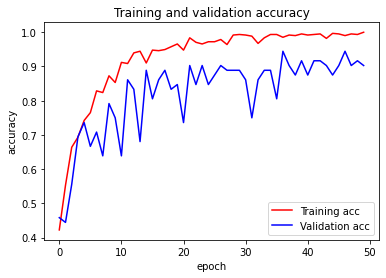

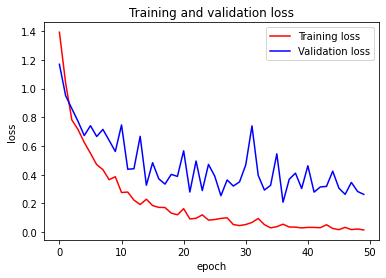

In [ ]:
#Graphing our training and validation
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))
plt.plot(epochs, acc, "r", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
generator_top = datagen.flow_from_directory( 
   test_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode="categorical", 
   shuffle=False) 
 
nb_test_samples = len(generator_top.filenames) 

num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
test_data = np.load("bottleneck_features_test.npy") 
 
# get the class labels for the training data, in the original order 
test_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 315 images belonging to 4 classes.


In [ ]:
model.evaluate(test_data,test_labels)

10/10 [==============================] - 0s 4ms/step - loss: 0.5603 - acc: 0.8286


[0.5603165626525879, 0.8285714387893677]

In [ ]:
preds=np.round( model.predict((test_data),0))

In [ ]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it"s categorical variable
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):

   if normalize:
     cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
   else:
     print("Confusion matrix, without normalization")
 
# print(cm)
 
   plt.imshow(cm, interpolation="nearest", cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = ".2f" if normalize else "d"
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
   plt.tight_layout()
   plt.ylabel("True label")
   plt.xlabel("Predicted label") 
   

Confusion matrix, without normalization


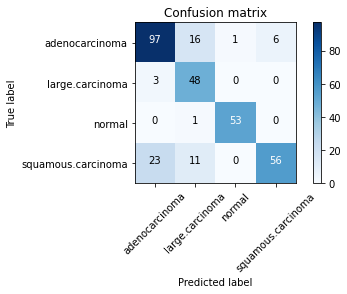

In [ ]:
plot_confusion_matrix(confusion_matrix,["adenocarcinoma",'large.carcinoma','normal','squamous.carcinoma'])

In [ ]:
#Final block to give image and test 

def read_image(file_path):
   print("[INFO] loading and preprocessing image…") 
   image = load_img(file_path, target_size=(224, 224)) 
   image = img_to_array(image) 
   image = np.expand_dims(image, axis=0)
   image /= 255. 
   return image
def test_single_image(path):
  animals = ["adenocarcinoma",'large.cell.carcinoma','normal','squamous.cell.carcinoma']
  images = read_image(path)
  time.sleep(.5)
  bt_prediction = vgg16.predict(images) 
  preds = model.predict(bt_prediction)
  for idx, animal, x in zip(range(0,6), animals , preds[0]):
   print("ID: {}, Label: {} {}%".format(idx, animal, round(x*100,2) ))
  print("Final Decision:")
  time.sleep(.5)
  for x in range(3):
   print("."*(x+1))
   time.sleep(.2)
  class_predicted = np.argmax(model.predict(bt_prediction), axis=-1)
  
  class_dictionary = generator_top.class_indices 
  inv_map = {v: k for k, v in class_dictionary.items()} 
  print("ID: {}, Label: {}".format(class_predicted[0],  inv_map[class_predicted[0]])) 


# CLASSIFICATION

[INFO] loading and preprocessing image…
ID: 0, Label: adenocarcinoma 95.95%
ID: 1, Label: large.cell.carcinoma 0.22%
ID: 2, Label: normal 0.15%
ID: 3, Label: squamous.cell.carcinoma 3.68%
Final Decision:
.
..
...
ID: 0, Label: adenocarcinoma


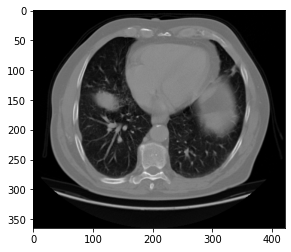

In [ ]:
img_path = "/content/Data/test/adenocarcinoma/000118 (7).png" #enter the image path
test_single_image(img_path)
uploaded_image = plt.imread(img_path)
plt.imshow(uploaded_image)

In [ ]:

# def heat_map(model,path):
# 	LAYER_NAME = 'block5_conv3'
# 	Corona_Index = np.argmax(model.predict(bt_prediction), axis=-1)
# 	with tf.GradientTape() as tape:
# 	    conv_outputs, predictions = grad_model(np.array([img]))
# 	    loss = predictions[:, Corona_Index]
	
# 	# Extract filters and gradients
# 	output = conv_outputs[0]
# 	grads = tape.gradient(loss, conv_outputs)[0]
	
	
# 	# Average gradients spatially
# 	weights = tf.reduce_mean(grads, axis=(0, 1))
	
# 	# Build a ponderated map of filters according to gradients importance
# 	cam = np.ones(output.shape[0:2], dtype=np.float32)
	
# 	for index, w in enumerate(weights):
# 	    cam += w * output[:, :, index]
	
# 	# Heatmap visualization
# 	cam = cv2.resize(cam.numpy(), (224, 224))
# 	cam = np.maximum(cam, 0)
# 	heatmap = (cam - cam.min()) / (cam.max() - cam.min())
	
# 	cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
	
# 	output_image = cv2.addWeighted(cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2BGR), 0.5, cam, 1, 0)
# 	img = Image.fromarray(output_image)
  
	

In [ ]:
heat_map(vgg16,img_path)

NameError: ignored

# Feature classification

## *Data preprocessing*

In [ ]:
!kaggle datasets download -d rishidamarla/cancer-patients-data

  0% 0.00/68.6k [00:00<?, ?B/s]
100% 68.6k/68.6k [00:00<00:00, 33.1MB/s]


In [ ]:
!unzip /content/cancer-patients-data.zip

Archive:  /content/cancer-patients-data.zip
  inflating: cancer patient data sets.xlsx  


In [ ]:
csv_data= pd.read_excel("/content/cancer patient data sets.xlsx",sheet_name="Sheet1")
csv_data.columns = csv_data.columns.str.replace(' ','_')

In [ ]:
csv_data.columns

Index(['Patient_Id', 'Age', 'Gender', 'Air_Pollution', 'Alcohol_use',
       'Dust_Allergy', 'OccuPational_Hazards', 'Genetic_Risk',
       'chronic_Lung_Disease', 'Balanced_Diet', 'Obesity', 'Smoking',
       'Passive_Smoker', 'Chest_Pain', 'Coughing_of_Blood', 'Fatigue',
       'Weight_Loss', 'Shortness_of_Breath', 'Wheezing',
       'Swallowing_Difficulty', 'Clubbing_of_Finger_Nails', 'Frequent_Cold',
       'Dry_Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
df=csv_data.copy()

In [ ]:
df.describe()

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,Passive_Smoker,Chest_Pain,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [ ]:
df.columns

Index(['Patient_Id', 'Age', 'Gender', 'Air_Pollution', 'Alcohol_use',
       'Dust_Allergy', 'OccuPational_Hazards', 'Genetic_Risk',
       'chronic_Lung_Disease', 'Balanced_Diet', 'Obesity', 'Smoking',
       'Passive_Smoker', 'Chest_Pain', 'Coughing_of_Blood', 'Fatigue',
       'Weight_Loss', 'Shortness_of_Breath', 'Wheezing',
       'Swallowing_Difficulty', 'Clubbing_of_Finger_Nails', 'Frequent_Cold',
       'Dry_Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
dic = {"Low":1,"Medium":2,"High":3}
dic["Low"]

1

In [ ]:
dic = {"Low":1,"Medium":2,"High":3}
for index,row in df.iterrows():
  df.at[index,'Level']=dic[row['Level']]


In [ ]:
df=df.drop(df.columns[0],axis=1)
df.columns = df.columns.str.replace(' ','_')

In [ ]:
df

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,Passive_Smoker,Chest_Pain,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3,3
996,37,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4,3
997,25,2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,3
998,18,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,3


## Random Forest


In [ ]:
pip install tensorflow_decision_forests

     |████████████████████████████████| 6.2 MB 8.5 MB/s 


In [ ]:
pip install wurlitzer

In [ ]:
import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

from IPython.core.magic import register_line_magic
from IPython.display import Javascript

In [ ]:
# Check the version of TensorFlow Decision Forests
print("Found TensorFlow Decision Forests v" + tfdf.__version__)


Found TensorFlow Decision Forests v0.1.7


In [ ]:
# Download the dataset
# !wget -q https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -O /tmp/penguins.csv

# Load a dataset into a Pandas Dataframe.
dataset_df = df.copy()

# Display the first 3 examples.
dataset_df.head(3)

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,Passive_Smoker,Chest_Pain,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,3


In [ ]:
# Split the dataset into a training and a testing dataset.
label="Level"
def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

707 examples in training, 293 examples for testing.


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [ ]:


# Specify the model.
model_1 = tfdf.keras.RandomForestModel()

# Optionally, add evaluation metrics.
model_1.compile(
    metrics=["accuracy"])

# Train the model.
# "sys_pipes" is optional. It enables the display of the training logs.
with sys_pipes():
  model_1.fit(x=train_ds)

12/12 [==============================] - 4s 2ms/step


[INFO kernel.cc:746] Start Yggdrasil model training
[INFO kernel.cc:747] Collect training examples
[INFO kernel.cc:392] Number of batches: 12
[INFO kernel.cc:393] Number of examples: 707
[INFO kernel.cc:769] Dataset:
Number of records: 707
Number of columns: 24

Number of columns by type:
	NUMERICAL: 23 (95.8333%)
	CATEGORICAL: 1 (4.16667%)

Columns:

NUMERICAL: 23 (95.8333%)
	0: "Age" NUMERICAL mean:37.1315 min:14 max:73 sd:12.2018
	1: "Air_Pollution" NUMERICAL mean:3.84017 min:1 max:8 sd:2.04024
	2: "Alcohol_use" NUMERICAL mean:4.5686 min:1 max:8 sd:2.62493
	3: "Balanced_Diet" NUMERICAL mean:4.4512 min:1 max:7 sd:2.15491
	4: "Chest_Pain" NUMERICAL mean:4.44413 min:1 max:9 sd:2.28597
	5: "Clubbing_of_Finger_Nails" NUMERICAL mean:3.90099 min:1 max:9 sd:2.35501
	6: "Coughing_of_Blood" NUMERICAL mean:4.87694 min:1 max:9 sd:2.41175
	7: "Dry_Cough" NUMERICAL mean:3.81471 min:1 max:7 sd:2.05742
	8: "Dust_Allergy" NUMERICAL mean:5.15983 min:1 max:8 sd:1.98186
	9: "Fatigue" NUMERICAL mean:3.8

In [ ]:
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

5/5 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000

loss: 0.0000
accuracy: 1.0000


In [ ]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

In [ ]:
model_1.summary()

Model: "random_forest_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (23):
	Age
	Air_Pollution
	Alcohol_use
	Balanced_Diet
	Chest_Pain
	Clubbing_of_Finger_Nails
	Coughing_of_Blood
	Dry_Cough
	Dust_Allergy
	Fatigue
	Frequent_Cold
	Gender
	Genetic_Risk
	Obesity
	OccuPational_Hazards
	Passive_Smoker
	Shortness_of_Breath
	Smoking
	Snoring
	Swallowing_Difficulty
	Weight_Loss
	Wheezing
	chronic_Lung_Disease

No weights

Variable Importance: NUM_NODES:
    1.        "Coughing_of_Blood" 350.000000 ################
    2.                      "Age" 347.000000 ###############
    3.                  "Obesity" 336.000000 ###############
    4.                 "Wheezing" 278.000000 ############
    5.        

In [ ]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=707, accuracy=0.9985855728429985, loss=0.01851462748473381, rmse=None, ndcg=None, aucs=None)

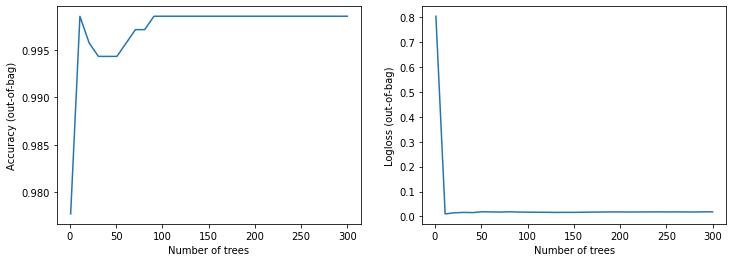

In [ ]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [ ]:
model_1.evaluate(x=test_ds)

5/5 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

## deep learning


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd 
import pandas as pd 
import numpy as np 
import scipy as sp 
import sklearn
import random 
import time 

from sklearn import preprocessing, model_selection


from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

In [ ]:
data = csv_data.copy()
data = data.drop(data.columns[0], axis =1)

In [ ]:
data = shuffle(data)


i = 8
data_to_predict = data[:i].reset_index(drop = True)
predict_species = data_to_predict.Level
predict_species = np.array(predict_species)
prediction = np.array(data_to_predict.drop(['Level'],axis= 1))

data = data[i:].reset_index(drop = True)

In [ ]:
X = data.drop(['Level'], axis = 1)
X = np.array(X)
Y = data['Level']

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = np_utils.to_categorical(Y)
print(Y)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,Y,test_size = 0.1, random_state = 0)

In [ ]:
input_dim = len(data.columns) - 1

prediction_model = Sequential()
.add(Dense(8, input_dim = input_dim , activation = 'relu'))
prediction_model.add(Dense(10, activation = 'relu'))
prediction_model.add(Dense(10, activation = 'relu'))
prediction_model.add(Dense(10, activation = 'relu'))
prediction_model.add(Dense(3, activation = 'softmax'))

prediction_model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

prediction_model.fit(train_x, train_y, epochs = 10, batch_size = 2)

scores = prediction_model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (prediction_model.metrics_names[1], scores[1]*100))

Epoch 1/10
446/446 [==============================] - 1s 1ms/step - loss: 1.0384 - accuracy: 0.4573
Epoch 2/10
446/446 [==============================] - 0s 1ms/step - loss: 0.7485 - accuracy: 0.6457
Epoch 3/10
446/446 [==============================] - 0s 1ms/step - loss: 0.5982 - accuracy: 0.7211
Epoch 4/10
446/446 [==============================] - 0s 1ms/step - loss: 0.5076 - accuracy: 0.7970
Epoch 5/10
446/446 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8650
Epoch 6/10
446/446 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.8528
Epoch 7/10
446/446 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8644
Epoch 8/10
446/446 [==============================] - 0s 1ms/step - loss: 0.2431 - accuracy: 0.9249
Epoch 9/10
446/446 [==============================] - 0s 1ms/step - loss: 0.2174 - accuracy: 0.9261
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9500

ac

In [ ]:
predictions = prediction_model.predict_classes(prediction)
prediction_ = np.argmax(to_categorical(predictions), axis = 1)
prediction_ = encoder.inverse_transform(prediction_)

for i, j in zip(prediction_ , predict_species):
    print( " the nn predict {}, and the species to find is {}".format(i,j))

 the nn predict Low, and the species to find is Low
 the nn predict Low, and the species to find is Low
 the nn predict High, and the species to find is High
 the nn predict Low, and the species to find is Low
 the nn predict High, and the species to find is High
 the nn predict High, and the species to find is High
 the nn predict High, and the species to find is High
 the nn predict Medium, and the species to find is Medium


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Model training and testing ends

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## prediction starts here , for every inividual 

In [ ]:
#function for prediction 
def prediction(values): #vlaues is array of 23 intgeres 
  warnings.warn("deprecated", DeprecationWarning)
  result=prediction_model.predict([values]) #passed for prediction 
  result_=np.argmax(to_categorical(result), axis = 1)
  result_= encoder.inverse_transform(result_) #encoder - converts predicated class 1,2,3 to low mid high 
  print(result_[0])

# these are the feature values and using this we predict 

#### following feature

'Age', 'Gender', 'Air_Pollution', 'Alcohol_use',
'Dust_Allergy', 'OccuPational_Hazards', 'Genetic_Risk',
'chronic_Lung_Disease', 'Balanced_Diet', 'Obesity', 'Smoking',
'Passive_Smoker', 'Chest_Pain', 'Coughing_of_Blood', 'Fatigue',
'Weight_Loss', 'Shortness_of_Breath', 'Wheezing',
'Swallowing_Difficulty', 'Clubbing_of_Finger_Nails', 'Frequent_Cold',
'Dry_Cough', 'Snoring'

In [ ]:
values=[46, 1, 6, 8, 7, 7, 7, 6, 7, 7, 8, 7, 7, 9, 3, 2, 4, 1, 4, 2, 4, 2, 3]


In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    prediction(values)

High
